<a href="https://colab.research.google.com/github/Manusha17/Spotify-Song-Collection-Analysis/blob/main/Big_Data_Project_Group_20_Feature_Relation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment and Dataset Setup


In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 65kB/s 
     |████████████████████████████████| 204kB 19.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=bb3cadb34a24d6bdaca2a5d122f4676d15ddb655a4571641a77e729a4c05e19d
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
! unzip spotify-dataset-19212020-160k-tracks.zip #only if uploaded zip file

In [ ]:
from pyspark.sql import functions as f
from pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder.getOrCreate()

dataframe_tracks = spark.read.csv('tracks.csv',header=True,inferSchema=True)

dataframe_tracks.show(2)
dataframe_tracks.schema

+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|                  id|                name|popularity|duration_ms|explicit|            artists|          id_artists|release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+--------------------+----------+-----------+--------+-------------------+--------------------+------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|35iwgR4jXetI318WE...|               Carve|         6|     126903|       0|            ['Uli']|['45tIt06XoI0Iio4...|  1922-02-22|       0.645| 0.445|  0| -13.338|   1|      0.451|       0.674|           0.744|   0.151|  0.127|104.851|             3|


StructType(List(StructField(id,StringType,true),StructField(name,StringType,true),StructField(popularity,StringType,true),StructField(duration_ms,StringType,true),StructField(explicit,StringType,true),StructField(artists,StringType,true),StructField(id_artists,StringType,true),StructField(release_date,StringType,true),StructField(danceability,StringType,true),StructField(energy,StringType,true),StructField(key,StringType,true),StructField(loudness,StringType,true),StructField(mode,StringType,true),StructField(speechiness,StringType,true),StructField(acousticness,StringType,true),StructField(instrumentalness,StringType,true),StructField(liveness,StringType,true),StructField(valence,StringType,true),StructField(tempo,StringType,true),StructField(time_signature,StringType,true)))

# Data Preprocessing

In [ ]:
# Import the pandas library
import pandas as pd

# Read the data from the dataset
store_data = pd.read_csv("tracks.csv", dtype='unicode')

In [ ]:
store_data.drop_duplicates(subset=['name'],inplace=True)
store_data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
data = store_data[['danceability','popularity','release_date','energy','valence']]
data.head()

,danceability,popularity,release_date,energy,valence
0,0.645,6,1922-02-22,0.445,0.127
1,0.695,0,1922-06-01,0.263,0.655
2,0.434,0,1922-03-21,0.177,0.457
3,0.321,0,1922-03-21,0.0946,0.397
4,0.402,0,1922,0.158,0.196


In [ ]:
frame = data.copy()
# frame.dropna(subset = ["name"], inplace=True)   #drop missing values
frame.danceability = frame.danceability.astype(float)
frame.energy = frame.energy.astype(float)
frame.valence = frame.valence.astype(float)
frame.popularity = frame.popularity.astype(int)
frame.release_date = pd.to_datetime(frame.release_date, format='%Y-%m-%d')
frame.sort_values(by=['release_date'],inplace=True)
nframe=frame.copy()
frame.head()

,danceability,popularity,release_date,energy,valence
478627,0.659,19,1900-01-01,0.791,0.956
132351,0.492,0,1922-01-01,0.375,0.572
132339,0.693,0,1922-01-01,0.750,0.944
93,0.328,0,1922-01-01,0.323,0.153
95,0.716,0,1922-01-01,0.301,0.969


In [ ]:
frame.release_date = frame.release_date.dt.year
frame.popularity = frame.groupby(frame.release_date)['popularity'].transform('mean')
frame.danceability = frame.groupby(frame.release_date)['danceability'].transform('mean')
frame.valence = frame.groupby(frame.release_date)['valence'].transform('mean')
frame.drop_duplicates(subset=['release_date'],inplace=True)
frame.columns=['mean_danceability','mean_popularity','release_year','energy','mean_valence']
frame

,mean_danceability,mean_popularity,release_year,energy,mean_valence
478627,0.659000,19.000000,1900,0.791,0.956000
132351,0.551988,0.065041,1922,0.375,0.575122
132441,0.639833,1.600629,1923,0.417,0.671646
116153,0.597698,0.361210,1924,0.535,0.547593
132756,0.612291,1.280431,1925,0.327,0.613161
...,...,...,...,...,...
90034,0.625189,41.307090,2017,0.983,0.495107
130697,0.633181,41.487079,2018,0.496,0.483894
569705,0.648932,44.700438,2019,0.570,0.495707
93363,0.654921,44.831653,2020,0.818,0.498337


# 1979 to 1999 Songs Analysis based on Popularity, Danceability, and Valence

In [ ]:
old_df = frame.copy()
old_df = old_df[(old_df['release_year'] >= 1979) & (old_df['release_year'] <= 1999)]

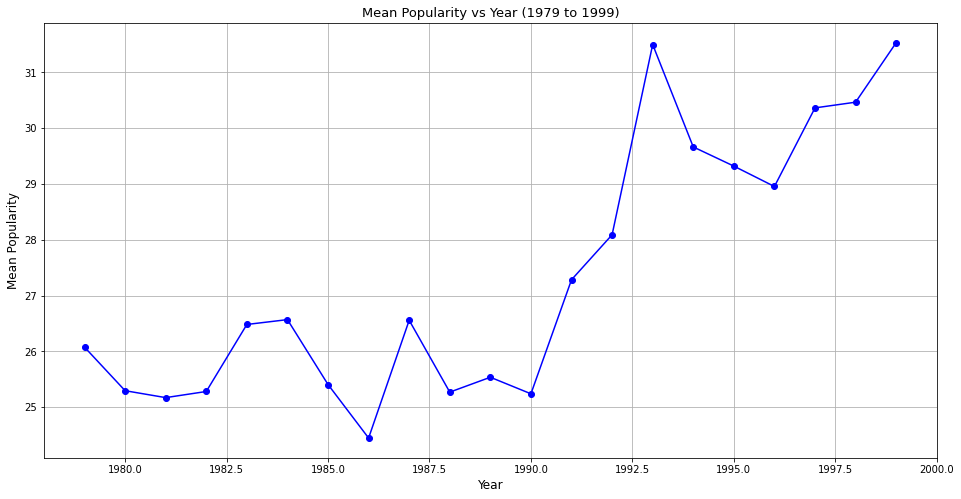

In [ ]:
import matplotlib.pyplot as plt

plt.plot(old_df.release_year, old_df.mean_popularity, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Mean Popularity vs Year (1979 to 1999)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Popularity',fontsize=12)
plt.grid(True)

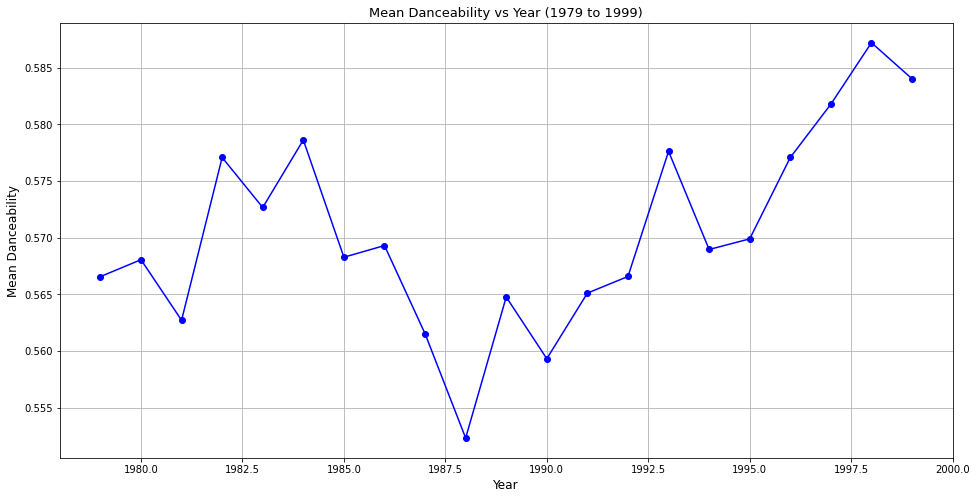

In [ ]:
plt.plot(old_df.release_year, old_df.mean_danceability, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Mean Danceability vs Year (1979 to 1999)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Danceability',fontsize=12)
plt.grid(True)

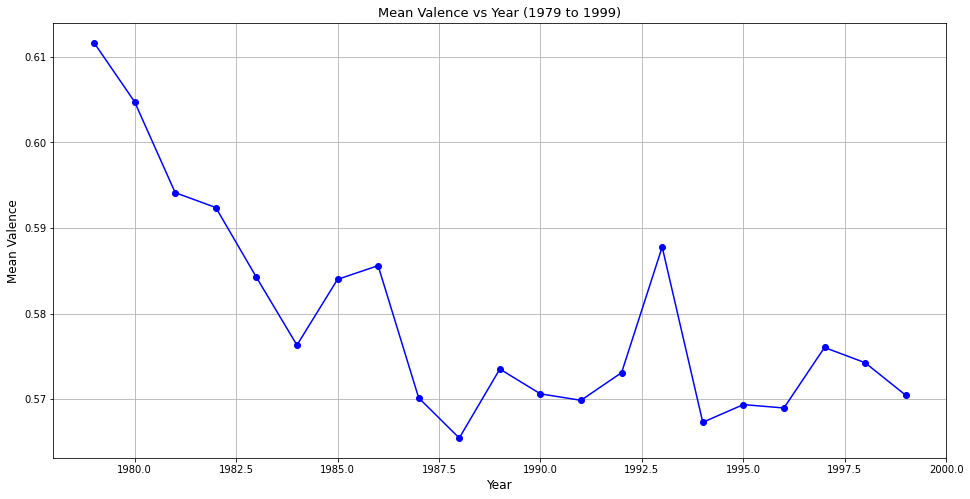

In [ ]:
plt.plot(old_df.release_year, old_df.mean_valence, color='blue', marker='o')
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Mean Valence vs Year (1979 to 1999)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Valence',fontsize=12)
plt.grid(True)

# 2000 to 2020 Songs Analysis based on Popularity, Danceability, and Valence

In [ ]:
new_df = frame.copy()
new_df = new_df[(new_df['release_year'] >= 2000) & (new_df['release_year'] <= 2020)]

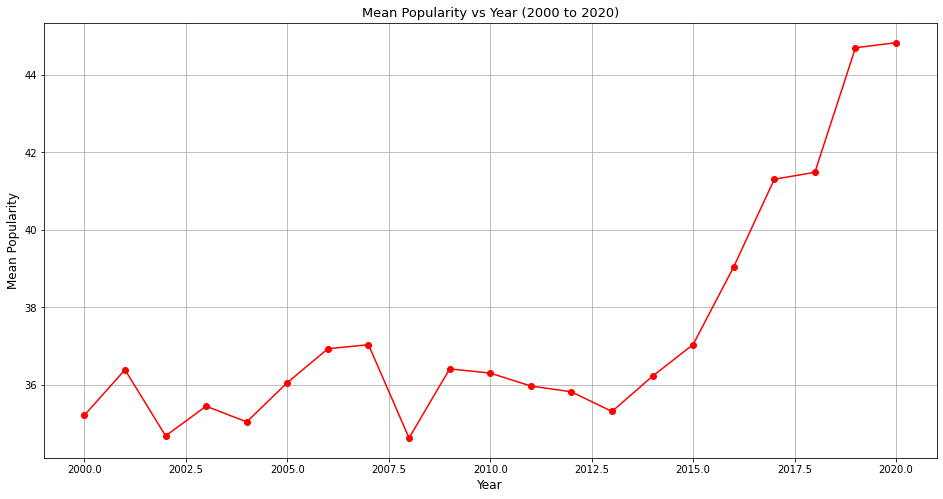

In [ ]:
plt.plot(new_df.release_year, new_df.mean_popularity, color='red', marker='o')
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Mean Popularity vs Year (2000 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Popularity',fontsize=12)
plt.grid(True)

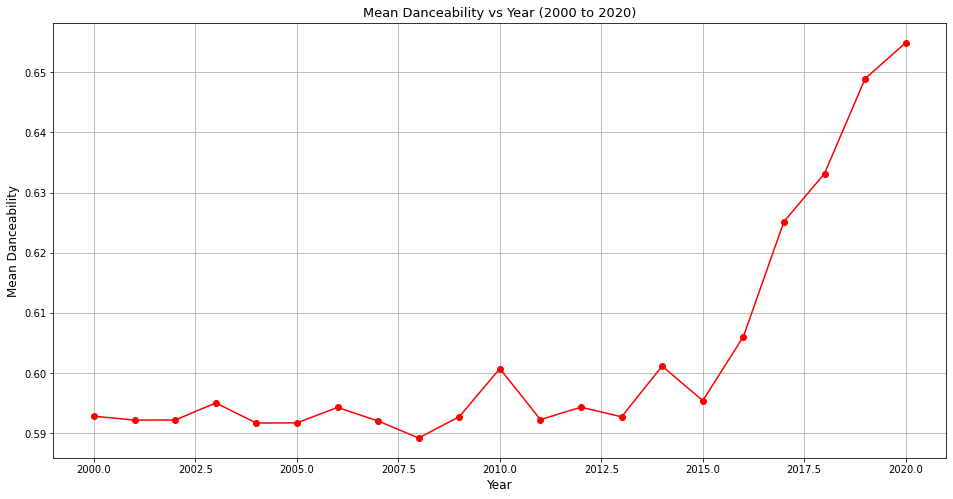

In [ ]:
plt.plot(new_df.release_year, new_df.mean_danceability, color='red', marker='o')
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Mean Danceability vs Year (2000 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Danceability',fontsize=12)
plt.grid(True)

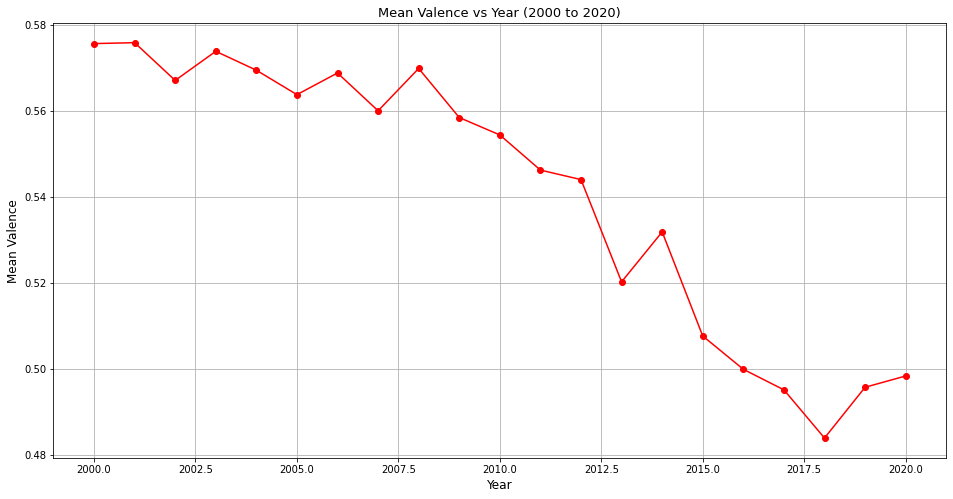

In [ ]:
plt.plot(new_df.release_year, new_df.mean_valence, color='red', marker='o')
plt.rcParams["figure.figsize"] = (16,8)
plt.title('Mean Valence vs Year (2000 to 2020)', fontsize=13)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Mean Valence',fontsize=12)
plt.grid(True)

# Clustering songs based on energy and danceability

Text(0, 0.5, 'danceability')

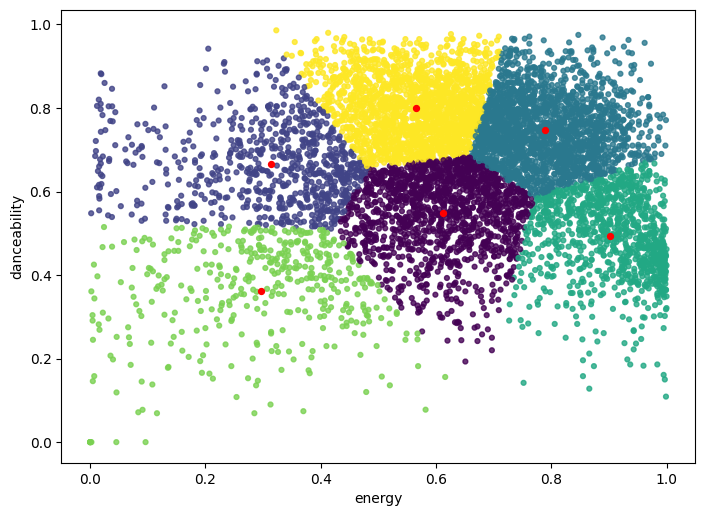

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# filter by date
start_date = "2020-06-01"
end_date = "2021-01-01"
after_start_date = nframe.release_date >= start_date
before_end_date = nframe.release_date <= end_date
nframe = nframe.loc[after_start_date & before_end_date]

# K-Means clustering
df = nframe[['energy','danceability']]
kmeans = KMeans(n_clusters = 6 ).fit(df)
centroids = kmeans.cluster_centers_

figure1 = plt.figure(figsize=(18,6), dpi=100)
ax1 = figure1.add_subplot(121)
ax1.scatter(df['energy'], df['danceability'], c= kmeans.labels_.astype(float), s=12, alpha=0.8)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=18)
plt.xlabel('energy')
plt.ylabel('danceability')

Text(0, 0.5, 'danceability')

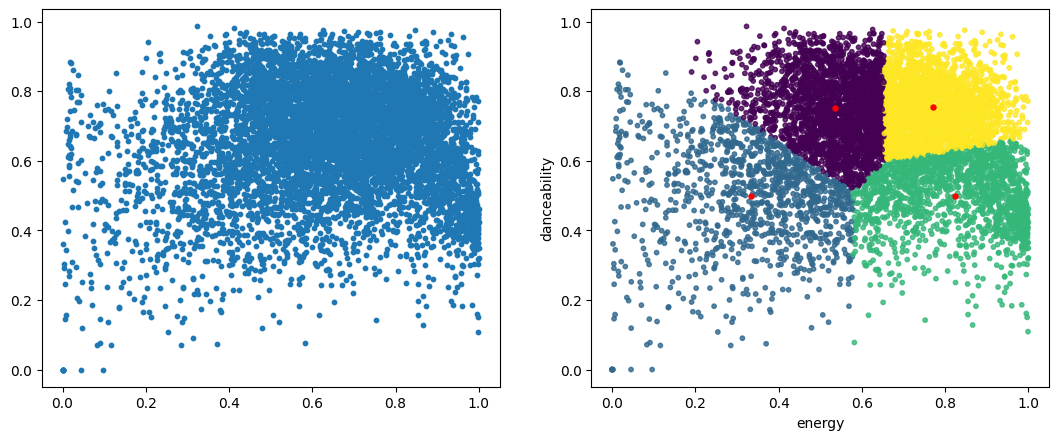

In [ ]:
# filter by date
start_date = "2020-06-01"
end_date = "2021-01-01"
after_start_date = nframe.release_date >= start_date
before_end_date = nframe.release_date <= end_date
nframe = nframe.loc[after_start_date & before_end_date]

# Scatter diagram
df = nframe[['energy','danceability']]
figure1 = plt.figure(figsize=(13,5), dpi=100)
ax1 = figure1.add_subplot(121)
ax1.scatter(df['energy'], df['danceability'], s=10)


# K-Means clustering
kmeans = KMeans(n_clusters = 4 ).fit(df)
centroids = kmeans.cluster_centers_
ax2 = figure1.add_subplot(122)
ax2.scatter(df['energy'], df['danceability'], c= kmeans.labels_.astype(float), s=10, alpha=0.8)
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=13)
plt.xlabel('energy')
plt.ylabel('danceability')
